# 0. Для удобства добавим расшифровку названий столбцов и краткое описание проекта.

Представлены данные оператора сотовой связи. Клиентам предлагается два тарифа: "Смарт" и "Ультра".

**Задача**: сделать анализ небольшой выборки клиентов, проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

Выборка содержит данные о 500 пользователях со следующей информацией: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Описание тарифов:

**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Описание данных**

***Таблица users (информация о пользователях):***

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

***Таблица calls (информация о звонках):***

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

***Таблица messages (информация о сообщениях):***

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

***Таблица internet (информация об интернет-сессиях):***

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

***Таблица tariffs (информация о тарифах):***

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# 1. Исследование данных

## 1.1 Открываем файл с данными и изучаем общую информацию

Внимание! Необходимо установить pandas более свежей версии

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#plt.style.use('dark_background')

In [4]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

Произведем первый взгляд на таблицы

In [5]:
pool_of_sheets = [calls, internet, messages, users]
pool_of_sheets_names = [
            'Звонки', 'Интернет-трафик',
            'Сообщения', 'Пользователи'
                        ]

for i in range(len(pool_of_sheets)):
  print('|', pool_of_sheets_names[i], '|')
  display(pool_of_sheets[i].head())
  print(pool_of_sheets[i].isna().mean())
  print('*****************************************')

| Звонки |


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
*****************************************
| Интернет-трафик |


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
*****************************************
| Сообщения |


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id              0.0
message_date    0.0
user_id         0.0
dtype: float64
*****************************************
| Пользователи |


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64
*****************************************


In [6]:
for i in range(len(pool_of_sheets)):
  print('|', pool_of_sheets_names[i], '|')
  display(pool_of_sheets[i].describe())
  display(pool_of_sheets[i].info())
  print('*****************************')
  print()

| Звонки |


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

*****************************

| Интернет-трафик |


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

*****************************

| Сообщения |


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

*****************************

| Пользователи |


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

*****************************



In [7]:
len(calls['user_id'].unique())

492

In [8]:
calls['user_id'].agg(['min', 'max'])

min    1000
max    1499
Name: user_id, dtype: int64

In [9]:
len(messages['user_id'].unique())

426

In [10]:
messages['user_id'].agg(['min', 'max'])

min    1000
max    1499
Name: user_id, dtype: int64

In [11]:
len(internet['user_id'].unique())

497

In [12]:
internet['user_id'].agg(['min', 'max'])

min    1000
max    1499
Name: user_id, dtype: int64

Интересно, что данные есть не по всем пользователям. Это значит, что при объединении таблиц по некоторым пользователям у нас будут пропущенные значения.

## **Вывод**

* Средняя продолжительность разговора составляет 6.7 минут, медиана - 6 минут. Разброс не очень большой. Максимальная продолжительность разговора составляет 38 минут (всего-то! среди моих знакомых есть те, которые и по несколько часов разговаривают без перерыва);
* call_date, session_date, message_date, churn_date, reg_date нужно привести к datetime;
* Так как по условиям секунды округляются до минут вверх (даже если звонок продолжительностью в 1 секунду), то можно округлить минуты до целого "вверх";
* Также и для интернет-трафика, но в этом случае считаются не отдельные сессии, а в целом интернет-трафик за месяц;
* Пропуски только в churn_date. По условиям это означает, что тариф действовал на момент выгрузки данных;
* В таблице с данными по интернет-трафику есть столбец "Unnamed: 0"

# 2. Предобработка (подготовка) данных

## 2.1 Приведение данных к другим типам, округление минут звонков

Приведем даты в тип datetime, а также приведем даты к месяцам

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Посмотрим диапазон дат для звонков

In [15]:
calls['call_date'].agg(['min', 'max'])

min   2018-01-01
max   2018-12-31
Name: call_date, dtype: datetime64[ns]

Все звонки произведены в период с января по декабрь 2018 года

In [16]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')

In [17]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,2018-12-01
202603,1499_216,2018-10-18,18.83,1499,2018-10-01
202604,1499_217,2018-11-10,10.81,1499,2018-11-01
202605,1499_218,2018-10-06,4.27,1499,2018-10-01


Тоже самое проделаем и для остальных

In [18]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d'
    )

In [19]:
internet['month'] = internet['session_date'].values.astype('datetime64[M]')

In [20]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
    )

In [21]:
messages['month'] = messages['message_date'].values.astype('datetime64[M]')

In [22]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Округлим минуты звонков в каждой сессии "вверх", а затем переведем в целочисленный формат (int)

In [23]:
calls['duration']

0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64

In [24]:
calls['duration'] = calls['duration'].apply(np.ceil)

Проверка

In [25]:
calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

In [26]:
calls['duration'] = calls['duration'].astype(int)

In [27]:
calls['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

Удалим столбец "Unnamed: 0" в таблице с интернет-трафиком, так как данный столбец повторяет индексы.

In [28]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [29]:
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id', 'month'], dtype='object')

## 2.2 Объединение таблиц

Чтобы создавать сводные таблицы по месяцам, необходимо произвести подготовку данных для слияния

Создадим датафрейм с месяцами (рыбу)

In [30]:
month = pd.DataFrame(pd.date_range('2018-01-01', '2018-12-01', freq='MS'))

In [31]:
month.columns = ['month']

In [32]:
month

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


Для каждого пользователя добавим месяца

In [33]:
template = users.merge(month, how='cross')

In [34]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-01-01
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-02-01
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-03-01
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-04-01
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
...,...,...,...,...,...,...,...,...,...
5995,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-08-01
5996,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01
5997,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01
5998,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01


Приведем дату регистрации к месяцам и отфильтруем строки с месяцами до регистрации

In [35]:
template['reg_month'] = template['reg_date'].to_numpy().astype('datetime64[M]')

In [36]:
template = template[template['reg_month'] <= template['month']]

Заготовка готова.

## 2.3 Расчеты израсходованных минут, сообщений, мегабайт и выручки по месяцам для каждого клиента

Расчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. 

In [37]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,2018-12-01
202603,1499_216,2018-10-18,19,1499,2018-10-01
202604,1499_217,2018-11-10,11,1499,2018-11-01
202605,1499_218,2018-10-06,5,1499,2018-10-01


In [38]:
calls_agg = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()

In [39]:
calls_agg.columns = ['user_id', 'month', 'calls_count', 'minutes_sum']

In [40]:
calls_agg

,user_id,month,calls_count,minutes_sum
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466
...,...,...,...,...
3169,1498,2018-10-01,41,247
3170,1499,2018-09-01,9,70
3171,1499,2018-10-01,68,449
3172,1499,2018-11-01,74,612


Добавим эти данные в заготовку

In [41]:
template = template.merge(calls_agg, how='left')

In [42]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,reg_month,calls_count,minutes_sum
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22.0,159.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43.0,172.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47.0,340.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52.0,408.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-12-01,2018-07-01,NaN,NaN
3255,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,2018-09-01,9.0,70.0
3256,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,2018-09-01,68.0,449.0
3257,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,2018-09-01,74.0,612.0


Рассчитаем также количество отправленных сообщений по месяцам для каждого пользователя

In [43]:
messages_agg = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

In [44]:
messages_agg.columns = ['user_id', 'month', 'messages_count']

In [45]:
messages_agg

,user_id,month,messages_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [46]:
template = template.merge(messages_agg, how='left')

In [47]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,reg_month,calls_count,minutes_sum,messages_count
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22.0,159.0,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43.0,172.0,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47.0,340.0,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52.0,408.0,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-12-01,2018-07-01,NaN,NaN,NaN
3255,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,2018-09-01,9.0,70.0,11.0
3256,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,2018-09-01,68.0,449.0,48.0
3257,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,2018-09-01,74.0,612.0,59.0


Также узнаем объем интернет-трафика

In [48]:
internet_agg = internet.groupby(
    ['user_id', 'month'])['mb_used'].sum().reset_index()

In [49]:
internet_agg.columns = ['user_id', 'month', 'mb_used_sum']

In [50]:
internet_agg

,user_id,month,mb_used_sum
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
...,...,...,...
3198,1498,2018-10-01,20579.36
3199,1499,2018-09-01,1845.75
3200,1499,2018-10-01,17788.51
3201,1499,2018-11-01,17963.31


In [51]:
internet_agg['gb_used_sum'] = (internet_agg['mb_used_sum'] / 1024).apply(np.ceil)

In [52]:
template = template.merge(internet_agg, how='left')

In [53]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,reg_month,calls_count,minutes_sum,messages_count,mb_used_sum,gb_used_sum
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,22.0,159.0,22.0,2253.49,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,43.0,172.0,60.0,23233.77,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,47.0,340.0,75.0,14003.64,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,52.0,408.0,81.0,14055.93,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,58.0,466.0,57.0,14568.91,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-12-01,2018-07-01,NaN,NaN,NaN,NaN,NaN
3255,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,2018-09-01,9.0,70.0,11.0,1845.75,2.0
3256,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,2018-09-01,68.0,449.0,48.0,17788.51,18.0
3257,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,2018-09-01,74.0,612.0,59.0,17963.31,18.0


Теперь рассчитаем помесячную выручку для каждого пользователя. Для этого сначала также добавим в таблицу данные по тарифам

In [54]:
template.rename(columns={'tariff': 'tariff_name'}, inplace=True)

In [55]:
template = template.merge(tariffs, how='left')

In [56]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [57]:
template['money_spent_minutes_over'] = (
    (template['minutes_sum'] - template['minutes_included']
     ) * template['rub_per_minute']
).clip(lower=0)

In [58]:
template['money_spent_messages_over'] = (
    (template['messages_count'] - template['messages_included']
    ) * template['rub_per_message']
).clip(lower=0)

In [59]:
template['money_spent_internet_over'] = (
    (((template['mb_used_sum'] - template['mb_per_month_included']) / 1024
     ).apply(np.ceil)
    ) * template['rub_per_gb']
).clip(lower=0)

In [60]:
template['money_spent_total'] = (
    template['money_spent_minutes_over']
    + template['money_spent_messages_over']
    + template['money_spent_internet_over']
    + template['rub_monthly_fee']
)

In [61]:
template[template['money_spent_total'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,reg_month,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money_spent_minutes_over,money_spent_messages_over,money_spent_internet_over,money_spent_total
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,2018-11-01,...,15360,500,550,200,3,3,0.0,NaN,600.0,NaN
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-12-01,2018-11-01,...,15360,500,550,200,3,3,0.0,NaN,0.0,NaN
42,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-02-01,2018-02-01,...,15360,500,550,200,3,3,0.0,NaN,0.0,NaN
43,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-03-01,2018-02-01,...,15360,500,550,200,3,3,0.0,NaN,400.0,NaN
44,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-04-01,2018-02-01,...,15360,500,550,200,3,3,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,2018-10-01,2018-08-01,...,15360,500,550,200,3,3,0.0,NaN,600.0,NaN
3227,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,2018-11-01,2018-08-01,...,15360,500,550,200,3,3,0.0,NaN,600.0,NaN
3228,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,2018-12-01,2018-08-01,...,15360,500,550,200,3,3,0.0,NaN,600.0,NaN
3253,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-11-01,2018-07-01,...,15360,500,550,200,3,3,NaN,NaN,NaN,NaN


Имеем два случая:
* Если в одном из трех значений стоимостей сверх лимита (минуты, гигабайты, смс) значение было пропущено, то и выручка будет неизвестным значением;
* Если во всех трех значения стоимости сверх лимита пропущены, то это говорит о том, что в этом месяце абонент не пользовался тарифом.

В первом случае нам необходимо заменить NaN нулями. Для этого определим те строки, где все три значения пропущены, и выделим такие строки в отдельный датафрейм для дальнейшего анализа оттока клиентов. Еще в таких строках `churn_date` будет меньше `month`

In [62]:
len(template[(template['money_spent_minutes_over'].isna())
    & (template['money_spent_messages_over'].isna())
    & (template['money_spent_internet_over'].isna())]
)

45

In [63]:
template['churn_month'] = template['churn_date'].to_numpy().astype('datetime64[M]')

In [64]:
len(template[template['churn_month'] < template['month']])

43

Суммы не совпадают, посмотрим на те строки, которые не вошли во второй датафрейм

In [65]:
temp_first = template[(template['money_spent_minutes_over'].isna())
    & (template['money_spent_messages_over'].isna())
    & (template['money_spent_internet_over'].isna())]

In [66]:
churn_clients = temp_first.copy()

In [67]:
temp_first.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name', 'month', 'reg_month', 'calls_count',
       'minutes_sum', 'messages_count', 'mb_used_sum', 'gb_used_sum',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'money_spent_minutes_over', 'money_spent_messages_over',
       'money_spent_internet_over', 'money_spent_total', 'churn_month'],
      dtype='object')

In [68]:
temp_second = template[template['churn_month'] < template['month']]

In [69]:
temp_first_second_merge = pd.merge(temp_first, temp_second, on=[
        'user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name', 'month', 'reg_month', 'calls_count',
       'minutes_sum', 'messages_count', 'mb_used_sum', 'gb_used_sum',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'money_spent_minutes_over', 'money_spent_messages_over',
       'money_spent_internet_over', 'money_spent_total', 'churn_month'],
       how='inner'
)

In [70]:
temp_first = temp_first.append(temp_first_second_merge)

In [71]:
temp_first['duplicated'] = temp_first.duplicated(keep=False)

In [72]:
temp_first[temp_first['duplicated']==False]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,reg_month,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money_spent_minutes_over,money_spent_messages_over,money_spent_internet_over,money_spent_total,churn_month,duplicated
840,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,2018-12-01,2018-12-01,...,1950,150,1,1,NaN,NaN,NaN,NaN,2018-12-01,False
2370,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,2018-12-01,2018-12-01,...,550,200,3,3,NaN,NaN,NaN,NaN,2018-12-01,False


Получилось так, что есть 2 пользователя, которые не пользовались услугами сотовой связи в декабре (регистрация тоже в декабре), но при этом тариф у них действовал (правда, всего несколько дней)

По таким клиентам мы не сможем ничего проанализировать. От этих двух строк тоже избавимся, нас они не интересуют.

In [73]:
len(template)

3259

In [74]:
template = template[(template['money_spent_minutes_over'].isna()==False)
    | (template['money_spent_messages_over'].isna()==False)
    | (template['money_spent_internet_over'].isna()==False)]

In [75]:
len(template)

3214

In [76]:
3259 - 3214 

45

In [77]:
template

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,reg_month,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,money_spent_minutes_over,money_spent_messages_over,money_spent_internet_over,money_spent_total,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2018-05-01,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,2018-05-01,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-07-01,2018-05-01,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-08-01,2018-05-01,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-09-01,2018-05-01,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-10-01,2018-07-01,...,500,550,200,3,3,0.0,0.0,1200.0,1750.0,2018-10-01
3255,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-09-01,2018-09-01,...,500,550,200,3,3,0.0,0.0,0.0,550.0,NaT
3256,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-10-01,2018-09-01,...,500,550,200,3,3,0.0,0.0,600.0,1150.0,NaT
3257,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,2018-11-01,2018-09-01,...,500,550,200,3,3,336.0,27.0,600.0,1513.0,NaT


Суммы сходятся. Теперь заполним пропущенные значения стоимостей нулями, а затем заново пересчитаем выручку по каждому клиенту.

In [78]:
template.loc[:, [
                 'money_spent_minutes_over',
                 'money_spent_messages_over',
                 'money_spent_internet_over'
                 ]] = template.loc[:, [
                                       'money_spent_minutes_over',
                                       'money_spent_messages_over',
                                       'money_spent_internet_over'
                                       ]].fillna(0)

In [79]:
template['money_spent_total'] = (
    template['money_spent_minutes_over']
    + template['money_spent_messages_over']
    + template['money_spent_internet_over']
    + template['rub_monthly_fee']
)

In [80]:
template['money_spent_total'].isna().sum()

0

Теперь видим, что пропусков нет, можно переходить к следующему этапу

Для удобства перезапишем данные в df

In [81]:
df = template.copy()

## **Вывод**

В данном разделе подготовили данные об израсходованных минутах, количестве звонков, отправленных сообщений, израсходованном трафике и выручке по месяцам для каждого клиента. Столкнулись со сложностью, что для некоторых пользователей есть данные, которые пропущены. Те строки по месяцам, в которых клиенты ни звонили, ни отправляли смс, ни пользовались интернетом, вырезали в отдельный датафрейм для дальнейшего анализа оттока клиентов.

Так как личная информация в виде имени и фамилии клиента излишняя, то удалим такие столбцы

In [82]:
df.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name', 'month', 'reg_month', 'calls_count',
       'minutes_sum', 'messages_count', 'mb_used_sum', 'gb_used_sum',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'money_spent_minutes_over', 'money_spent_messages_over',
       'money_spent_internet_over', 'money_spent_total', 'churn_month'],
      dtype='object')

In [83]:
df = df.drop(['first_name', 'last_name'], 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [84]:
df['money_spent_total'] = df['money_spent_total'].astype(int)

# 3. Исследовательский анализ данных

## 3.1 Отток клиентов

In [85]:
len(churn_clients.groupby('user_id'))

24

In [86]:
print(f'Процент клиентов, которые перестали пользоваться услугами данного оператора составляет {24/500*100}%')

Процент клиентов, которые перестали пользоваться услугами данного оператора составляет 4.8%


## 3.2 Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Для того, чтобы ответить на этот вопрос, составим сводную таблицу

In [87]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [88]:
df.columns

Index(['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name',
       'month', 'reg_month', 'calls_count', 'minutes_sum', 'messages_count',
       'mb_used_sum', 'gb_used_sum', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'money_spent_minutes_over', 'money_spent_messages_over',
       'money_spent_internet_over', 'money_spent_total', 'churn_month'],
      dtype='object')

In [89]:
df_pivot_traffic_monthly = df.groupby(['tariff_name', 'month'])[
                          'minutes_sum',
                          'messages_count',
                          'mb_used_sum'
                          ].agg(['median', 'mean']).reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [90]:
df_pivot_traffic_monthly.columns = ['_'.join(col).rstrip('_') for col in df_pivot_traffic_monthly.columns.values]

In [91]:
df_pivot_traffic_monthly

,tariff_name,month,minutes_sum_median,minutes_sum_mean,messages_count_median,messages_count_mean,mb_used_sum_median,mb_used_sum_mean
0,smart,2018-01-01,162.50,203.85,16.00,20.00,7096.19,8513.72
1,smart,2018-02-01,258.00,298.69,22.50,27.94,12553.71,11597.05
2,smart,2018-03-01,409.00,390.05,29.00,35.55,15670.25,15104.16
3,smart,2018-04-01,368.50,367.13,32.50,35.86,14087.65,13462.18
4,smart,2018-05-01,433.00,387.36,37.00,39.03,16323.94,15805.18
5,smart,2018-06-01,401.00,398.07,33.00,38.58,16077.44,15794.65
6,smart,2018-07-01,414.00,408.35,35.00,38.99,15925.29,15743.15
7,smart,2018-08-01,432.50,423.27,33.50,38.75,16834.71,16681.71
8,smart,2018-09-01,436.00,430.27,34.00,39.22,16028.43,16303.58
9,smart,2018-10-01,428.00,427.59,35.00,39.08,17225.33,16757.12


<function matplotlib.pyplot.show(*args, **kw)>

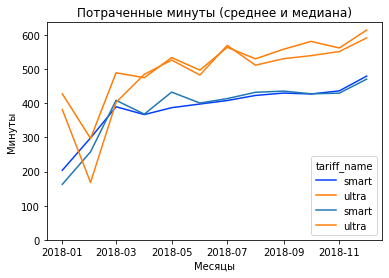

In [92]:
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='minutes_sum_mean', hue='tariff_name', palette='bright', legend='full')
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='minutes_sum_median', hue='tariff_name')
plt.ylim(0)
plt.title('Потраченные минуты (среднее и медиана)')
plt.xlabel('Месяцы')
plt.ylabel('Минуты')
plt.show

На графике видно, что количество израсходованных минут увеличивается в течение года. Пользователи тарифа ультра больше тратят минут, чем пользователи тарифа смарт.

<function matplotlib.pyplot.show(*args, **kw)>

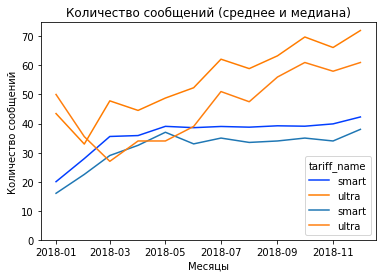

In [93]:
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='messages_count_mean', hue='tariff_name', palette='bright', legend='full')
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='messages_count_median', hue='tariff_name')
plt.ylim(0)
plt.title('Количество сообщений (среднее и медиана)')
plt.xlabel('Месяцы')
plt.ylabel('Количество сообщений')
plt.show

Количество сообщений тоже увеличивается в течение года

<function matplotlib.pyplot.show(*args, **kw)>

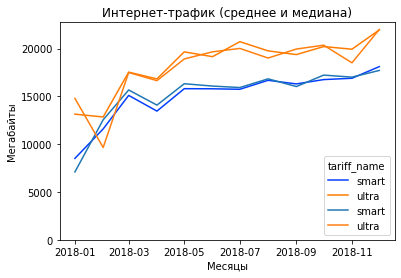

In [94]:
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='mb_used_sum_mean', hue='tariff_name', palette='bright', legend='full')
sns.lineplot(data=df_pivot_traffic_monthly, x='month', y='mb_used_sum_median', hue='tariff_name')
plt.ylim(0)
plt.title('Интернет-трафик (среднее и медиана)')
plt.xlabel('Месяцы')
plt.ylabel('Мегабайты')
plt.show

Количество израсходованных минут, мегабайт и смс в течение года растет. Пользователи тарифа "Ультра" больше расходуют минут, мегабайт и смс.

In [95]:
df.groupby('tariff_name')[['minutes_sum', 'messages_count', 'mb_used_sum']].agg(['mean', 'median']).reset_index()

tariff_name minutes_sum        messages_count        mb_used_sum         
                     mean median           mean median        mean   median
0       smart      419.06 423.00          38.72  34.00    16215.66 16507.74
1       ultra      545.45 528.00          61.16  51.00    19668.49 19394.29

Такое количество минут, сообщений, мегабайт каждый месяц в среднем требуется пользователям разных тарифов. Интересно, что среднее и медиана почти схожи. Это говорит о том, что значения "в целом" распределены нормально.

In [96]:
var_smart_minutes = np.var(df[df['tariff_name']=='smart']['minutes_sum'], ddof=1)

In [97]:
var_ultra_minutes = np.var(df[df['tariff_name']=='ultra']['minutes_sum'], ddof=1)

In [98]:
var_smart_messages = np.var(df[df['tariff_name']=='smart']['messages_count'], ddof=1)

In [99]:
var_ultra_messages = np.var(df[df['tariff_name']=='ultra']['messages_count'], ddof=1)

In [100]:
var_smart_mb = np.var(df[df['tariff_name']=='smart']['mb_used_sum'], ddof=1)

In [101]:
var_ultra_mb = np.var(df[df['tariff_name']=='ultra']['mb_used_sum'], ddof=1)

In [102]:
std_smart_minutes = np.sqrt(var_smart_minutes)

In [103]:
std_ultra_minutes = np.sqrt(var_ultra_minutes)

In [104]:
std_smart_messages = np.sqrt(var_smart_messages)

In [105]:
std_ultra_messages = np.sqrt(var_ultra_messages)

In [106]:
std_smart_mb = np.sqrt(var_smart_mb)

In [107]:
std_ultra_mb = np.sqrt(var_ultra_mb)

Построим таблицы с дисперсией и стандартным отклонением в разрезе тарифов

In [108]:
tariffs_var_table = pd.DataFrame(data=[[
                                                'smart',
                                                var_smart_minutes,
                                                var_smart_messages,
                                                var_smart_mb
                                                ],
                                                [
                                                 'ultra',
                                                 var_ultra_minutes,
                                                 var_ultra_messages,
                                                 var_ultra_mb
                                                ]], columns=[
                                                            'tariff_name',
                                                            'var_minutes',
                                                            'var_messages',
                                                            'var_mb']
)

In [109]:
tariffs_var_table

,tariff_name,var_minutes,var_messages,var_mb
0,smart,35844.19,717.59,34359951.68
1,ultra,94203.42,2109.66,98864248.95


In [110]:
df.groupby('tariff_name')[['minutes_sum', 'messages_count', 'mb_used_sum']].agg(['mean', 'median', 'var', 'std']).reset_index()

tariff_name minutes_sum                        messages_count         \
                     mean median      var    std           mean median   
0       smart      419.06 423.00 35844.19 189.33          38.72  34.00   
1       ultra      545.45 528.00 94203.42 306.93          61.16  51.00   

                mb_used_sum                               
      var   std        mean   median         var     std  
0  717.59 26.79    16215.66 16507.74 34359951.68 5861.74  
1 2109.66 45.93    19668.49 19394.29 98864248.95 9943.05

In [111]:
tariffs_std_table = pd.DataFrame(data=[[
                                        'smart',
                                        std_smart_minutes,
                                        std_smart_messages,
                                        std_smart_mb
                                        ],
                                        [
                                         'ultra',
                                         std_ultra_minutes,
                                         std_ultra_messages,
                                         std_ultra_mb
                                        ]], columns=[
                                                   'tariff_name',
                                                   'std_minutes',
                                                   'std_messages',
                                                   'std_mb'
                                                   ])

In [112]:
tariffs_std_table

,tariff_name,std_minutes,std_messages,std_mb
0,smart,189.33,26.79,5861.74
1,ultra,306.93,45.93,9943.05


Построим гистограммы и определим распределение данных

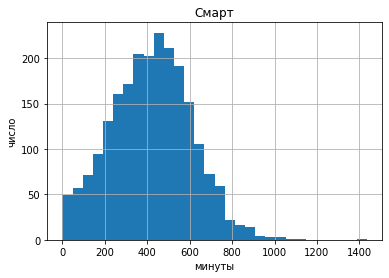

In [113]:
df[df['tariff_name']=='smart']['minutes_sum'].hist(bins=30)
plt.xlabel('минуты')
plt.ylabel('число')
plt.title('Смарт')
plt.show()

Минуты звонков по тарифу смарт за месяц распределены "в целом" нормально, скошенность вправо.

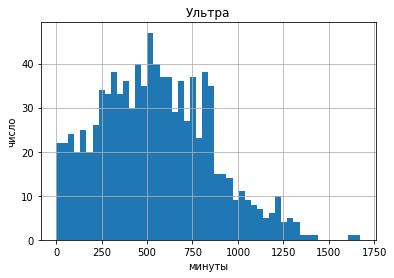

In [114]:
df[df['tariff_name']=='ultra']['minutes_sum'].hist(bins=50)
plt.xlabel('минуты')
plt.ylabel('число')
plt.title('Ультра')
plt.show()

Для тарифа "Ультра" пик ярко выражен, скошенность тоже вправо

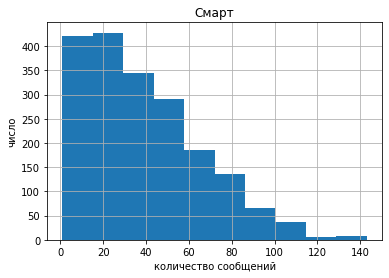

In [115]:
df[df['tariff_name']=='smart']['messages_count'].hist(bins=10)
plt.xlabel('количество сообщений')
plt.ylabel('число')
plt.title('Смарт')
plt.show()

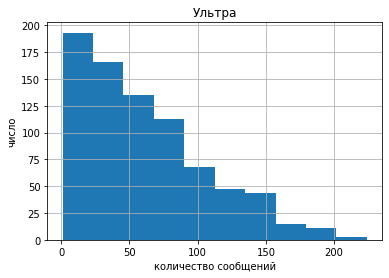

In [116]:
df[df['tariff_name']=='ultra']['messages_count'].hist(bins=10)
plt.xlabel('количество сообщений')
plt.ylabel('число')
plt.title('Ультра')
plt.show()

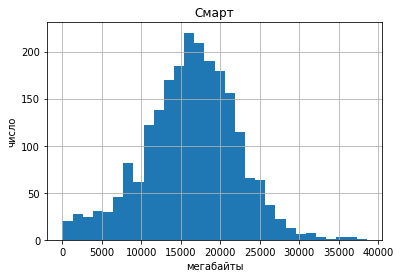

In [117]:
df[df['tariff_name']=='smart']['mb_used_sum'].hist(bins=30)
plt.xlabel('мегабайты')
plt.ylabel('число')
plt.title('Смарт')
plt.show()

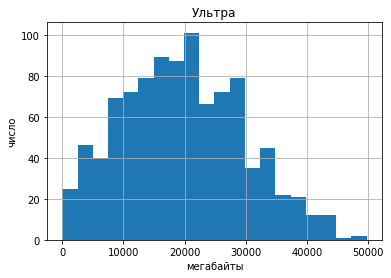

In [118]:
df[df['tariff_name']=='ultra']['mb_used_sum'].hist(bins=20)
plt.xlabel('мегабайты')
plt.ylabel('число')
plt.title('Ультра')
plt.show()

In [119]:
len(df[df['tariff_name']=='smart']) / len(df)

0.693528313627878

### Выводы

Количество израсходованных минут, мегабайт и смс в течение года растет. Пользователи тарифа "Ультра" больше расходуют минут, мегабайт и смс.
Распределение потраченных минут и мегабайтов интернета близко к нормальному. При этом в данной выборке больше данных по месяцам по тарифу "Смарт", чем "Ультра"

Дополнительные визуализации

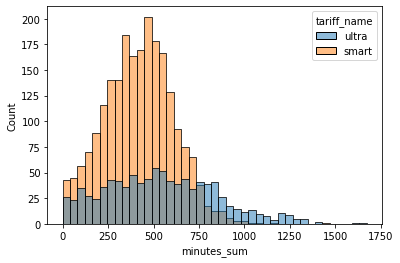

In [120]:
sns.histplot(data=df, x='minutes_sum', hue='tariff_name')

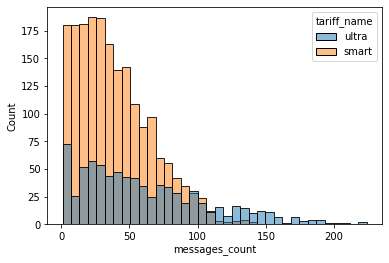

In [121]:
sns.histplot(data=df, x='messages_count', hue='tariff_name')

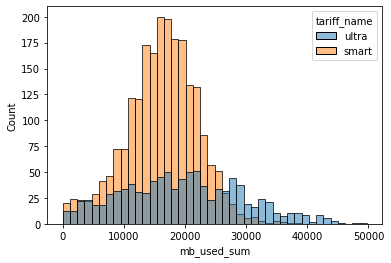

In [122]:
sns.histplot(data=df, x='mb_used_sum', hue='tariff_name')

# 4. Проверка гипотез

## 4.1 Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Если альтернативная гипотеза состоит в том, что средние выручки пользователей разных тарифов ультра различаются, то нулевой гипотезой будет: средние выручки пользователей разных тарифов равны.

Сначала определим среднюю выручку по тарифам

In [123]:
df.columns

Index(['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name',
       'month', 'reg_month', 'calls_count', 'minutes_sum', 'messages_count',
       'mb_used_sum', 'gb_used_sum', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'money_spent_minutes_over', 'money_spent_messages_over',
       'money_spent_internet_over', 'money_spent_total', 'churn_month'],
      dtype='object')

In [124]:
df.groupby('tariff_name')['money_spent_total'].mean()

tariff_name
smart   1289.97
ultra   2070.15
Name: money_spent_total, dtype: float64

Как видим, средние выручки по тарифам из данной выборки не равны. Какова вероятность, что средние выручек разных тарифов генеральной совокупности равны? Для этого, чтобы определить это сначала выделим тарифы в отдельные переменные, а затем воспользуемся методом `ttest_ind`.

In [125]:
df_smart = df.loc[df.loc[:, 'tariff_name'] == 'smart']['money_spent_total'].copy()

In [126]:
df_ultra = df.loc[df.loc[:, 'tariff_name'] == 'ultra']['money_spent_total'].copy()

Проверка сумм

In [127]:
len(df_smart) + len(df_ultra) == len(df)

True

При использовании метода `ttest_ind` параметр ***equal_var*** проигнорируем. Оценить дисперсии генеральных совокупностей этих тарифов не предполагается возможным и данный параметр необязателен.

Порог (alpha) зададим 5% (будем строгими)

In [128]:
results = st.ttest_ind(df_smart, df_ultra)

In [129]:
results.pvalue

1.4229814360764067e-160

Как видим, это значение близко к нулю. Это значит, что нулевая гипотез маловероятна (не подтвердилась, можно отвергнуть). Тогда принимаем альтернативную гипотезу.

### Выводы

После проведения t-теста нулевая гипотеза (средние выручки клиентов разных тарифов примерно равны) была отвергнута. Была принята альтернативная гипотеза (средние выручки различных тарифов не равны (различаются))

## 4.2 Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Если альтернативная гипотеза состоит в том, что средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов, то нулевая гипотеза будет: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Создадим соответствующие датасеты с пользователями из Москвы и не из Москвы в разрезе тарифов

In [130]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [137]:
users_moscow_gain = df[df['city'] == 'Москва']['money_spent_total'].copy()

In [138]:
users_region_gain = df[df['city'] != 'Москва']['money_spent_total'].copy()

Воспользуемся тем же самым методом для подтверждения нулевой гипотезы

In [139]:
results = st.ttest_ind(users_moscow_gain, users_region_gain)
print(results.pvalue)

0.5440152911670224


### Выводы

Вероятность, что средние выручек пользователей не из Москвы и из Москвы равны велика. В этом случае принимаем нулевую гипотезу, что средние показатели выручек клиентов из Москвы и не из Москвы могут быть примерно равны.

Тогда альтернативную гипотезу (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов) отвергаем.

# Финальный вывод

В результате проделанной работы было выявлено:

* В данных были обнаружены пропуски в кол-ве отправленных смс, потраченных минут, использованного трафика. Это скорее всего говорит о том, что есть пользователи, которые пользовались не всеми услугами. Такие пропуски заполнили нулями;
* Выручка пользователей растет в течение года (пользователи к концу года стали больше тратить минут, гигабайт и смс;
* Пользователи тарифа "Смарт" используют в среднем 419 минут, 39 смс, 16 ГБ интернет-трафика в месяц;
* Пользователи тарифа "Ультра" используют в среднем 545 минут, 61 смс, 19.5 ГБ интернет-трафика в месяц;
* Было выявлено, что данные количеству израсходованных минут, смс, ГБ распределены нормально со скошенностью вправо;
* Гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" принята;
* Гипотеза "средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов" отвергнута;